# **Proyek: Segmentasi Nasabah Menggunakan K-Means Clustering**

### _Analisis Berbasis Data untuk Mengidentifikasi Pola Perilaku Nasabah_

- **Penyusun:** `Rozhak`
- **Versi Proyek:** `3.0`
- **Pembaruan Terakhir:** `8 September 2025`

## **1. Pengaturan Lingkungan & Pustaka**

Tahap awal ini mencakup impor semua pustaka Python yang diperlukan untuk analisis data, visualisasi, pra-pemrosesan, dan pemodelan machine learning. Pengaturan gaya visualisasi juga ditetapkan di sini untuk konsistensi.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

import joblib

sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-pastel')
print("[INFO] Semua pustaka berhasil diimpor.")

[INFO] Semua pustaka berhasil diimpor.


## **2. Pemuatan dan Eksplorasi Data Awal (EDA)**



### **2.1. Memuat Dataset**

Data dimuat dari URL Google Drive ke dalam DataFrame `pandas`. Selanjutnya, dilakukan inspeksi awal untuk memahami struktur, tipe data, dan statistik deskriptif dari dataset.

In [ ]:
PATH = '/content/bank_transactions_data.csv'
df = pd.read_csv(PATH)

In [ ]:
print("[ANALISIS] 5 Baris Pertama Dataset:")
display(df.head())

[ANALISIS] 5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
print("[ANALISIS] Informasi RIngkas Dataset:")
df.info()

[ANALISIS] Informasi RIngkas Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null  

In [ ]:
print("[ANALISIS] Statistik Deskriptif:")
display(df.describe())

[ANALISIS] Statistik Deskriptif:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### **2.2. Analisis Eksplorasi Data (EDA) - Opsional**

Bagian ini berisi analisis visual untuk mendapatkan wawasan lebih dalam dari data. Ini mencakup korelasi antar fitur numerik dan distribusi masing-masing fitur.

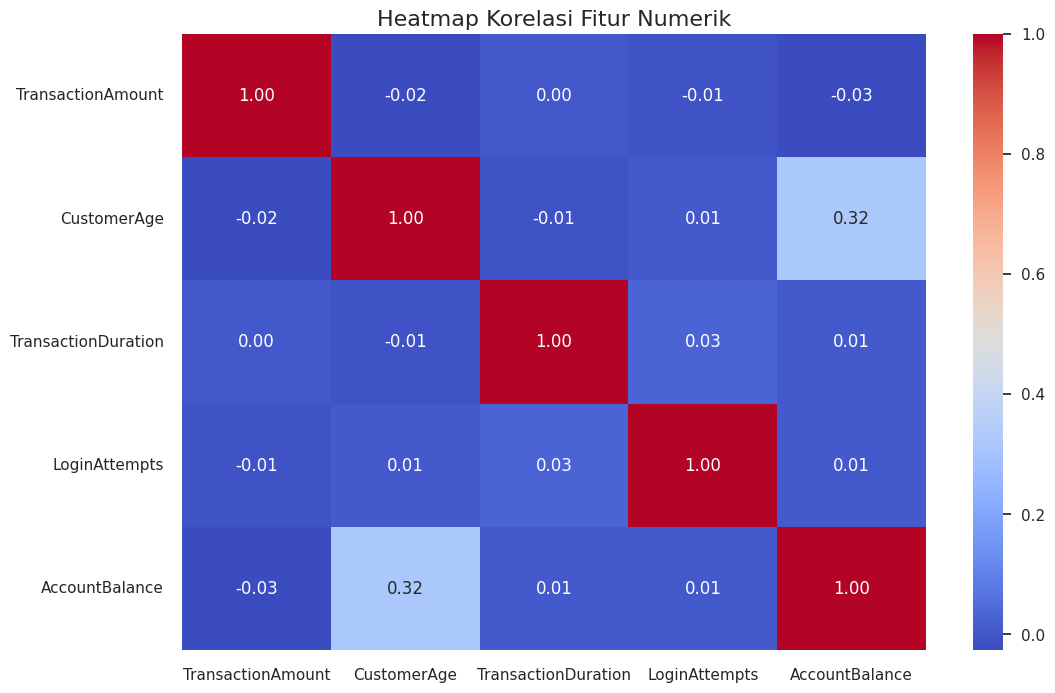

In [ ]:
numerical_features = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.show()

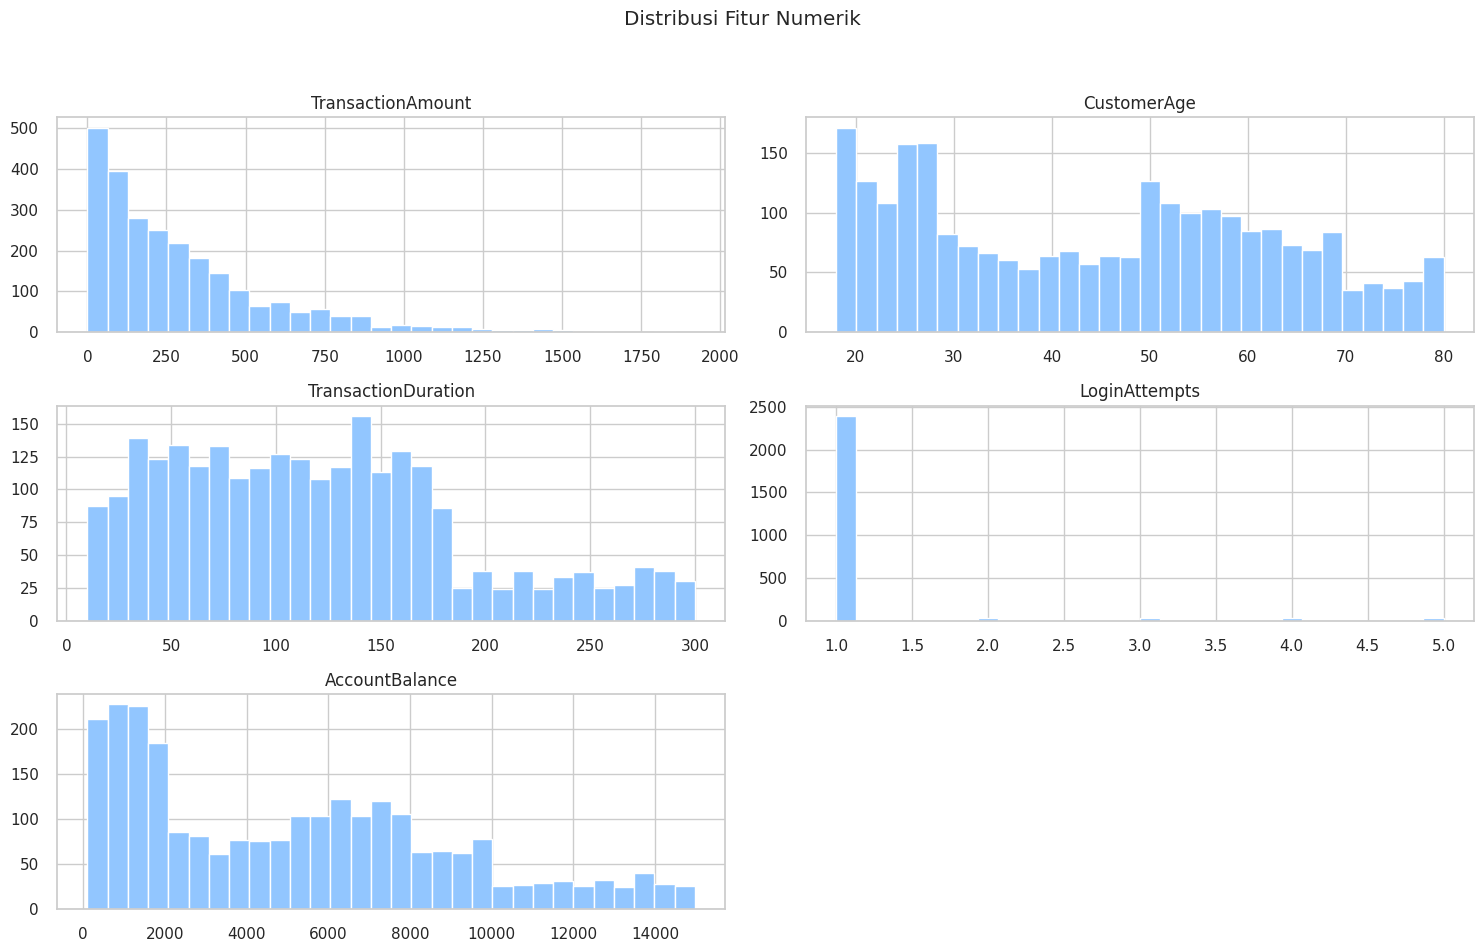

In [ ]:
numerical_features.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

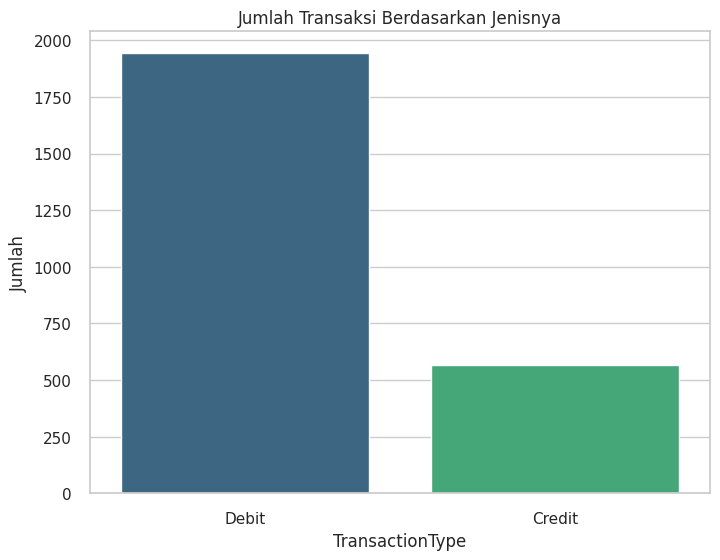

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TransactionType', hue='TransactionType', palette='viridis', legend=False)
plt.title('Jumlah Transaksi Berdasarkan Jenisnya')
plt.ylabel('Jenis Transaksi')
plt.ylabel('Jumlah')
plt.show()

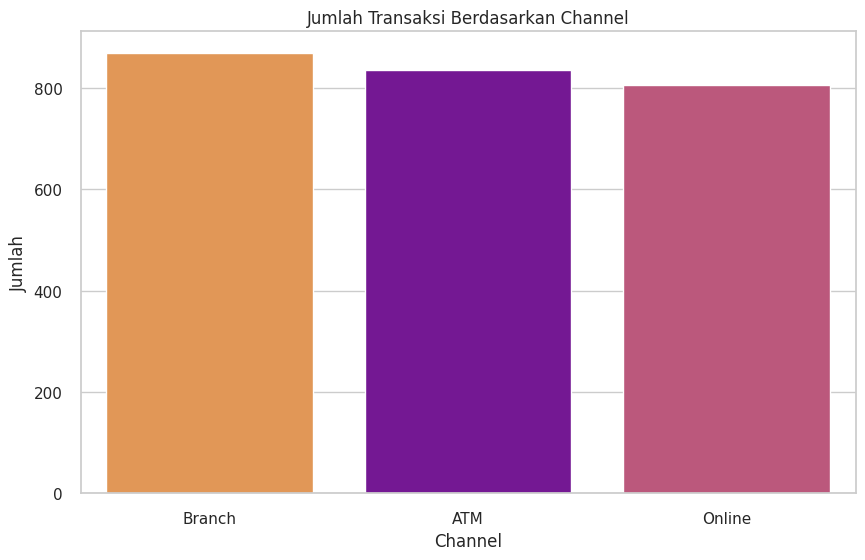

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Channel', hue='Channel', palette='plasma', legend=False, order = df['Channel'].value_counts().index)
plt.title('Jumlah Transaksi Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Jumlah')
plt.show()

## **3. Pembersihan dan Pra-pemrosesan Data**

Tahap ini adalah fondasi dari pemodelan, di mana data mentah diubah menjadi format yang bersih, terstruktur, dan siap untuk dilatih oleh model.

### **3.1. Pemeriksaan Awal & Penskalaan (Sebelum Pembersihan)**

Melakukan pemeriksaan nilai hilang dan duplikat. Penskalaan awal dilakukan pada salinan data untuk melihat efeknya.

In [ ]:
print("[VALIDASI] Pengecekan nilai hilang awal:")
print(df.isnull().sum())

[VALIDASI] Pengecekan nilai hilang awal:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
print(f"[VALIDASI] Jumlah baris duplikat awal: {df.duplicated().sum()}")

[VALIDASI] Jumlah baris duplikat awal: 21


In [ ]:
df_scaled = df.copy()
numerical_cols = df_scaled.select_dtypes(include=np.number).columns

scaler = StandardScaler()

df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
print("[PROSES] Penskalaan awal pada salinan dataset selesai.")
display(df_scaled.head())

[PROSES] Penskalaan awal pada salinan dataset selesai.


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


### **3.2. Penghapusan Kolom & Encoding Kategorikal**

Menghapus kolom-kolom yang tidak relevan (seperti ID) dan mengubah fitur kategorikal menjadi format numerik.

In [ ]:
columns_to_drop = [
    'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID',
    'TransactionDate', 'PreviousTransactionDate'
]

df.drop(columns=columns_to_drop, inplace=True)
print("[PROSES] Kolom-kolom yang tidak relevan telah dihapus.")
display(df.head())

[PROSES] Kolom-kolom yang tidak relevan telah dihapus.


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
4,13.45,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
print("[PROSES] Encoding fitur kategorikal selesai.")
display(df.head())

[PROSES] Encoding fitur kategorikal selesai.


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
4,13.45,0,1,2,NaN,3,198.0,1.0,7429.40


### **3.3. Pembersihan Akhir & Rekayasa Fitur (Opsional)**

Membersihkan nilai hilang dan duplikat secara permanen. Bagian ini juga mencakup rekayasa fitur tingkat lanjut seperti penanganan *outlier* dan *binning*.

In [ ]:
df.dropna(inplace=True)
print("[PROSES] Baris dengan nilai hilang telah dihapus secara permanen.")
print("[VALIDASI] Pengecekan nilai null setelah dropna():")
print(df.isnull().sum())

[PROSES] Baris dengan nilai hilang telah dihapus secara permanen.
[VALIDASI] Pengecekan nilai null setelah dropna():
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)
print(f"[VALIDASI] Jumlah duplikat setelah dibersihkan: {df.duplicated().sum()}")

[VALIDASI] Jumlah duplikat setelah dibersihkan: 0


In [ ]:
outlier_cols = ['TransactionAmount', 'AccountBalance']
print(f"[PROSES] Bentuk DataFrame sebelum menangani outlier: {df.shape}")

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"[PROSES] Bentuk DataFrame setelah menangani outlier: {df.shape}")

[PROSES] Bentuk DataFrame sebelum menangani outlier: (2397, 9)
[PROSES] Bentuk DataFrame setelah menangani outlier: (2291, 9)


In [ ]:
age_bins = [17, 30, 50, 81] # Rentang usia: 18-30, 31-50, 51-80
age_labels = ['Muda', 'Dewasa', 'Senior']
df['AgeBin'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels)

balance_bins = [-1, 2000, 8000, 15000] # Saldo: Rendah, Menengah, Tinggi
balance_labels = ['Saldo Rendah', 'Saldo Menengah', 'Saldo Tinggi']
df['AccountBalanceBin'] = pd.cut(df['AccountBalance'], bins=balance_bins, labels=balance_labels)

le_bin = LabelEncoder()
df['AgeBin'] = le_bin.fit_transform(df['AgeBin'])
df['AccountBalanceBin'] = le_bin.fit_transform(df['AccountBalanceBin'])

df.drop(['CustomerAge', 'AccountBalance'], axis=1, inplace=True)

print("[SELESAI] Proses binning dan rekayasa fitur selesai.")
display(df.head())

[SELESAI] Proses binning dan rekayasa fitur selesai.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AgeBin,AccountBalanceBin
0,14.09,1,36,0,0,81.0,1.0,2,0
1,376.24,1,15,0,0,141.0,1.0,2,2
2,126.29,1,23,2,3,56.0,1.0,1,1
3,184.50,1,33,2,3,25.0,1.0,1,2
5,92.15,1,28,0,3,172.0,1.0,1,1


## **4. Pembangunan Model Clustering**

### **4.1. Penskalaan Data Final**

Setelah data sepenuhnya bersih, dilakukan penskalaan akhir pada semua fitur numerik untuk mempersiapkannya sebelum masuk ke model.

In [ ]:
final_numerical_cols = df.select_dtypes(include=np.number).columns
scaler_final = StandardScaler()
df[final_numerical_cols] = scaler_final.fit_transform(df[final_numerical_cols])

print("[ANALISIS] Statistik deskriptif data final yang siap dimodelkan:")
display(df.describe())

[ANALISIS] Statistik deskriptif data final yang siap dimodelkan:


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AgeBin,AccountBalanceBin
count,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03
mean,-1.643770e-16,-4.186961e-17,-4.729715e-17,8.994212e-17,1.899640e-17,5.582614e-17,1.488697e-16,4.497106e-17,-4.109424e-17
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-1.180479e+00,-1.794047e+00,-1.723367e+00,-1.221330e+00,-1.324620e+00,-1.555405e+00,-2.046726e-01,-1.443833e+00,-9.781365e-01
25%,-8.185274e-01,4.817899e-01,-8.364133e-01,-1.221330e+00,-1.324620e+00,-8.019044e-01,-2.046726e-01,-1.443833e+00,-9.781365e-01
50%,-2.600676e-01,4.817899e-01,-3.009187e-02,-1.474655e-02,4.085064e-01,-1.052716e-01,-2.046726e-01,-2.086495e-01,2.915013e-01
75%,5.483145e-01,4.817899e-01,8.568617e-01,1.191837e+00,1.275069e+00,6.055783e-01,-2.046726e-01,1.026534e+00,2.915013e-01
max,2.993431e+00,2.757626e+00,1.743815e+00,2.398421e+00,2.141632e+00,2.567524e+00,6.615762e+00,1.026534e+00,1.561139e+00


### **4.2. Penentuan Jumlah Cluster Optimal (Elbow Method)**

Menggunakan `KElbowVisualizer` dari pustaka `yellowbrick` untuk secara visual menentukan jumlah cluster (k) yang paling optimal.

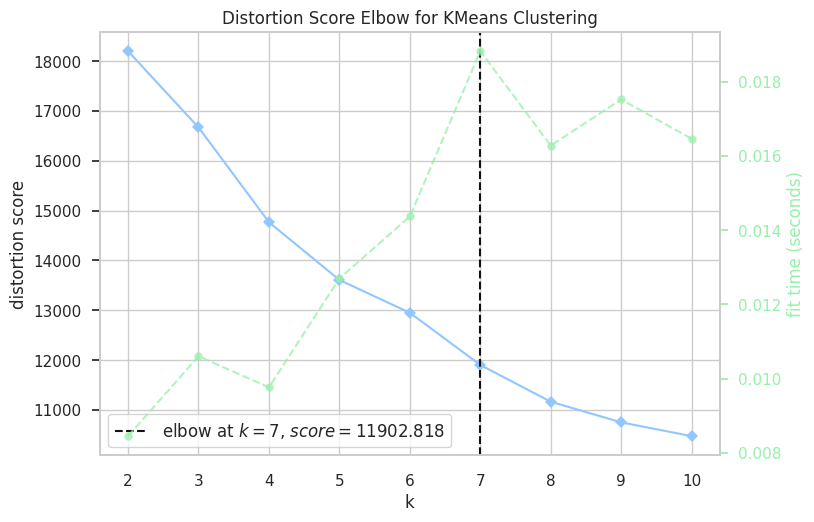

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df)
visualizer.show()

### **4.3. Pelatihan Model K-Means**

Melatih model K-Means dengan jumlah cluster optimal yang didapat dari Elbow Method. Hasil cluster ditambahkan sebagai kolom baru bernama `Target`.

In [ ]:
optimal_k = 7
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans.fit(df)

df['Target'] = model_kmeans.labels_

print(f"[SELESAI] Model K-Means dengan k={optimal_k} berhasil dilatih.")
display(df.head())

[SELESAI] Model K-Means dengan k=7 berhasil dilatih.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AgeBin,AccountBalanceBin,Target
0,-1.116548,0.48179,1.179390,-1.221330,-1.324620,-0.545998,-0.204673,1.026534,-0.978136,0
1,0.557537,0.48179,-0.513885,-1.221330,-1.324620,0.307021,-0.204673,1.026534,1.561139,6
2,-0.597889,0.48179,0.131172,1.191837,1.275069,-0.901423,-0.204673,-0.208650,0.291501,3
3,-0.328806,0.48179,0.937494,1.191837,1.275069,-1.342150,-0.204673,-0.208650,1.561139,3
5,-0.755706,0.48179,0.534333,-1.221330,1.275069,0.747748,-0.204673,-0.208650,0.291501,3


In [ ]:
joblib.dump(model_kmeans, "model_clustering.h5")
print("[SELESAI] Model 'model_clustering.h5 telah berhasil disimpan.")

[SELESAI] Model 'model_clustering.h5 telah berhasil disimpan.


### **4.4. Evaluasi dan Visualisasi Cluster (Opsional)**

Menghitung *Silhouette Score* untuk mengukur kualitas pemisahan cluster. Selanjutnya, PCA digunakan untuk mereduksi dimensi agar cluster dapat divisualisasikan dalam plot 2D.

In [ ]:
silhouette_avg = silhouette_score(df.drop('Target', axis=1), df['Target'])
print(f"Silhoutte Score untuk K = {optimal_k} adalah: {silhouette_avg}")

Silhoutte Score untuk K = 7 adalah: 0.17249151671951632


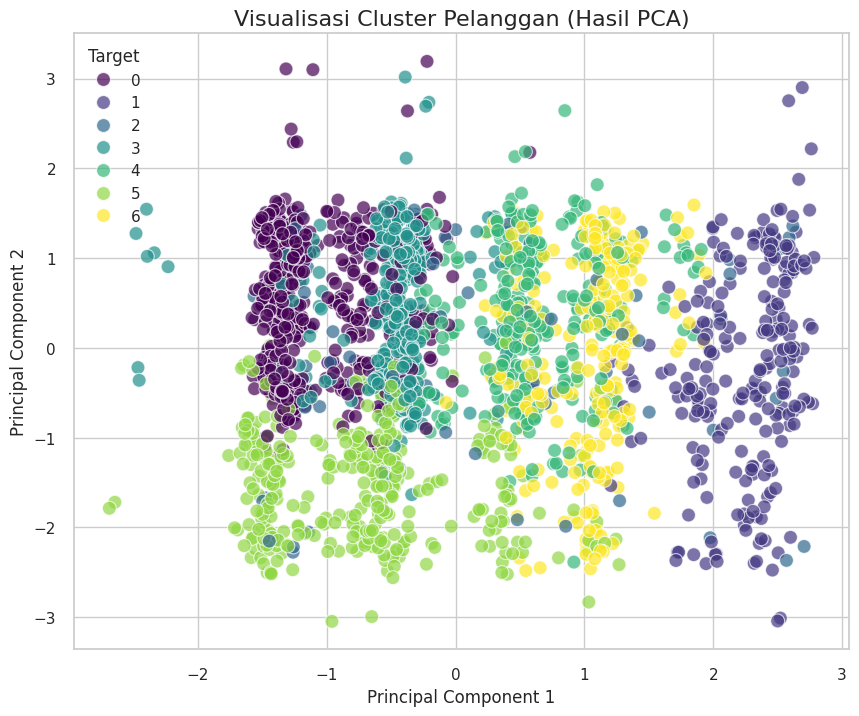

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Target', axis=1))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Target'], palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster Pelanggan (Hasil PCA)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## **5. Interpretasi dan Ekspor Hasil**

**5.1. Analisis Profil Cluster**

Melakukan analisis deskriptif dengan mengelompokkan data berdasarkan label cluster untuk memahami karakteristik masing-masing segmen.

In [ ]:
scaled_analysis = df.groupby('Target').agg(['mean', 'min', 'max'])
print("[ANALISIS] Profil Cluster (Berdasarkan Data yang Telah Diskalakan):")
display(scaled_analysis)

[ANALISIS] Profil Cluster (Berdasarkan Data yang Telah Diskalakan):


TransactionAmount                     TransactionType            \
                    mean       min       max            mean       min   
Target                                                                   
0              -0.031446 -1.177798  2.925848        0.525725  0.481790   
1              -0.025288 -1.179601  2.963846       -0.005889 -1.794047   
2              -0.069991 -1.172759  2.641880       -0.026926 -1.794047   
3               0.015102 -1.180479  2.993431        0.511093  0.481790   
4              -0.077911 -1.180202  2.927882        0.427924 -1.794047   
5               0.126819 -1.162497  2.933568       -1.794047 -1.794047   
6               0.003622 -1.172528  2.841993        0.024991 -1.794047   

                  Location                       Channel  ...  \
             max      mean       min       max      mean  ...   
Target                                                    ...   
0       2.757626 -0.081149 -1.723367  1.743815 -0.152176  ...   
1       2.757626  0.107118 -1.723367  1.743815  0.182971  ...   
2       0.481790 -0.121159 -1.723367  1.663183  0.098814  ...   
3       2.757626 -0.021440 -1.723367  1.743815 -0.110548  ...   
4       2.757626  0.120437 -1.723367  1.743815 -0.111130  ...   
5      -1.794047  0.037358 -1.723367  1.743815  0.376489  ...   
6       2.757626 -0.063038 -1.723367  1.743815 -0.079617  ...   

       TransactionDuration LoginAttempts                        AgeBin  \
                       max          mean       min       max      mean   
Target                                                                   
0                 2.553307     -0.184922 -0.204673  1.500436  1.019380   
1                 2.567524     -0.183180 -0.204673  1.500436 -1.360795   
2                 2.439571      4.830413  3.205545  6.615762 -0.077865   
3                 2.553307     -0.186377 -0.204673  1.500436 -0.200698   
4                 2.425354     -0.194583 -0.204673  1.500436 -1.246496   
5                 2.482222     -0.190734 -0.204673  1.500436  0.185128   
6                 2.468005     -0.174115 -0.204673  1.500436  0.893719   

                           AccountBalanceBin                      
             min       max              mean       min       max  
Target                                                            
0      -0.208650  1.026534         -0.833525 -0.978136  0.291501  
1      -1.443833 -0.208650          1.475785  0.291501  1.561139  
2      -1.443833  1.026534          0.037574 -0.978136  1.561139  
3      -1.443833  1.026534          0.250633 -0.978136  1.561139  
4      -1.443833 -0.208650         -0.809102 -0.978136  0.291501  
5      -1.443833  1.026534         -0.414237 -0.978136  1.561139  
6      -0.208650  1.026534          1.383663  0.291501  1.561139  

[7 rows x 27 columns]

### **5.2. Penyimpanan Hasil Clustering**

Mengekspor DataFrame yang telah berisi label cluster (`Target`) ke dalam sebuah file CSV.

In [ ]:
df.to_csv('data_clustering.csv', index=False)
print("[SELESAI] File 'data_clustering.csv' telah berhasil disimpan.")

[SELESAI] File 'data_clustering.csv' telah berhasil disimpan.


### **5.3. Inverse Transform untuk Interpretasi Lanjutan (Opsional)**

Mengembalikan data ke skala dan label aslinya untuk interpretasi yang lebih mudah dipahami dari sudut pandang bisnis.

In [ ]:
df_interpret = df.copy()

all_cols_scaled = df_interpret.drop('Target', axis=1).columns

df_interpret[all_cols_scaled] = scaler_final.inverse_transform(df_interpret[all_cols_scaled])
print("[PROSES] Inverse scaling selesai.")
display(df_interpret.head())

[PROSES] Inverse scaling selesai.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AgeBin,AccountBalanceBin,Target
0,14.09,1.0,36.0,0.0,0.0,81.0,1.0,2.0,0.0,0
1,376.24,1.0,15.0,0.0,0.0,141.0,1.0,2.0,2.0,6
2,126.29,1.0,23.0,2.0,3.0,56.0,1.0,1.0,1.0,3
3,184.50,1.0,33.0,2.0,3.0,25.0,1.0,1.0,2.0,3
5,92.15,1.0,28.0,0.0,3.0,172.0,1.0,1.0,1.0,3


In [ ]:
for col in categorical_cols:
    le = encoders[col]
    df_interpret[col] = le.inverse_transform(df_interpret[col].astype(int))

print("[PROSES] Inverse encoding selesai.")
display(df_interpret.head())

[PROSES] Inverse encoding selesai.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AgeBin,AccountBalanceBin,Target
0,14.09,Debit,San Diego,ATM,Doctor,81.0,1.0,2.0,0.0,0
1,376.24,Debit,Houston,ATM,Doctor,141.0,1.0,2.0,2.0,6
2,126.29,Debit,Mesa,Online,Student,56.0,1.0,1.0,1.0,3
3,184.50,Debit,Raleigh,Online,Student,25.0,1.0,1.0,2.0,3
5,92.15,Debit,Oklahoma City,ATM,Student,172.0,1.0,1.0,1.0,3


In [ ]:
def get_mode(series):
    return series.mode()[0]

agg_functions_numeric = {col: ['mean', 'min', 'max'] for col in df_interpret.select_dtypes(include=np.number).columns if col != 'Target'}
agg_functions_categorical = {col: [get_mode] for col in categorical_cols}

all_agg_functions = {**agg_functions_numeric, **agg_functions_categorical}

cluster_analysis = df_interpret.groupby('Target').agg(all_agg_functions)
print("[ANALISIS] Profil Cluster (Berdasarkan Data Asli):")
display(cluster_analysis)

[ANALISIS] Profil Cluster (Berdasarkan Data Asli):


TransactionAmount               TransactionDuration               \
                    mean   min     max                mean   min    max   
Target                                                                    
0             248.827066  0.84  888.57          121.301158  11.0  299.0   
1             250.159118  0.45  896.79          132.235294  10.0  300.0   
2             240.488706  1.93  827.14          132.141176  11.0  291.0   
3             258.896695  0.26  903.19          119.469957  11.0  299.0   
4             238.775533  0.32  889.01          111.547337  10.0  290.0   
5             283.063978  4.15  890.24          118.455041  10.0  294.0   
6             256.413333  1.98  870.43          111.716846  11.0  293.0   

       LoginAttempts              AgeBin           AccountBalanceBin       \
                mean  min  max      mean  min  max              mean  min   
Target                                                                      
0           1.011583  1.0  2.0  1.994208  1.0  2.0          0.113900  0.0   
1           1.012605  1.0  2.0  0.067227  0.0  1.0          1.932773  1.0   
2           3.952941  3.0  5.0  1.105882  0.0  2.0          0.800000  0.0   
3           1.010730  1.0  2.0  1.006438  0.0  2.0          0.967811  0.0   
4           1.005917  1.0  2.0  0.159763  0.0  1.0          0.133136  0.0   
5           1.008174  1.0  2.0  1.318801  0.0  2.0          0.444142  0.0   
6           1.017921  1.0  2.0  1.892473  1.0  2.0          1.860215  1.0   

            TransactionType       Location  Channel CustomerOccupation  
        max        get_mode       get_mode get_mode           get_mode  
Target                                                                  
0       1.0           Debit        Chicago      ATM            Retired  
1       2.0           Debit       San Jose   Online             Doctor  
2       2.0           Debit     Fort Worth   Online             Doctor  
3       2.0           Debit  Oklahoma City      ATM            Student  
4       1.0           Debit           Mesa      ATM           Engineer  
5       2.0          Credit         Austin   Branch            Student  
6       2.0           Debit     Sacramento   Branch             Doctor

In [ ]:
df_interpret.to_csv('data_clustering_inverse.csv', index=False)
print("[SELESAI] File 'data_clustering_inverse.csv telah berhasil disimpan.")

[SELESAI] File 'data_clustering_inverse.csv telah berhasil disimpan.


### **Proyek Clustering Selesai**

Alur kerja clustering telah selesai. Hasil segmentasi nasabah kini tersedia untuk dianalisis lebih dalam oleh tim bisnis.